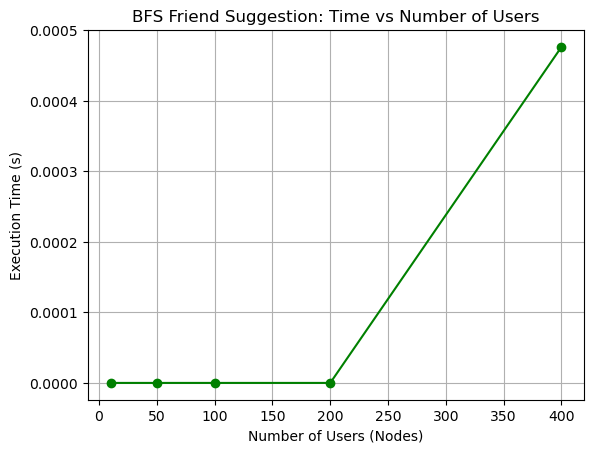

In [2]:
from collections import deque
import matplotlib.pyplot as plt
import random, time

def friend_suggestions(graph, user):
    visited = set([user])
    queue = deque([user])
    friends = set(graph[user])
    suggestions = set()

    while queue:
        curr = queue.popleft()
        for neigh in graph[curr]:
            if neigh not in visited:
                visited.add(neigh)
                queue.append(neigh)
                if neigh not in friends and neigh != user:
                    suggestions.add(neigh)
    return suggestions

#  Measure time on different graph sizes 
sizes = [10, 50, 100, 200, 400]
times = []

for n in sizes:
    nodes = [chr(65 + i % 26) + str(i) for i in range(n)]
    graph = {u: random.sample(nodes, random.randint(1, min(10, n-1))) for u in nodes}
    start = time.time()
    friend_suggestions(graph, nodes[0])
    end = time.time()
    times.append(end - start)

plt.plot(sizes, times, marker='o', color='green')
plt.title("BFS Friend Suggestion: Time vs Number of Users")
plt.xlabel("Number of Users (Nodes)")
plt.ylabel("Execution Time (s)")
plt.grid(True)
plt.show()
